### Student Information
Name:黃毓翔

Student ID:109065522

GitHub ID:cecilhyh

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

### Begin Assignment Here

### First

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [1]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [2]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [3]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

In [4]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [5]:
# add category to the dataframe
X['category'] = twenty_train.target

In [6]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [7]:
#Answer here
# select where category > 1
X.loc[X['category']>1,'text':'category']

text  category
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3
5     From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3
6     From: jodfishe@silver.ucs.indiana.edu (joseph ...         3
...                                                 ...       ...
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2

[1193 rows x 2 columns]

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [8]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [9]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [10]:
# Answer here
# Inspect the data tupe of "missing_example"
print("Ans: We can see that all records with 'str' type are not considerd as missing values by .isnull()")
NA_df['type'] = [type(r) for r in NA_df['missing_example'] ]
NA_df['is_null'] = NA_df['missing_example'].isnull()
NA_df

Ans: We can see that all records with 'str' type are not considerd as missing values by .isnull()


id missing_example                type  is_null
0  A             NaN     <class 'float'>     True
1  B             NaN     <class 'float'>     True
2  C             NaN       <class 'str'>    False
3  D            None       <class 'str'>    False
4  E            None  <class 'NoneType'>     True
5  F                       <class 'str'>    False

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [11]:
X_sample = X.sample(n=1000) #random state

In [12]:
# Answer here
X_copy = X.copy()
X_sample = X.sample(n=1000) #random state
print('Index | Num of diff: ' + str(sum(X_copy.index!=X.index)))
print('Columns\' name | Num of diff: ' + str(sum(X_copy.columns!=X.columns)))
for col_index in range(0,len(X.columns)):
    print('Column ' + str(col_index) + ' | Num of diff: ' + str(sum(X_copy.iloc[:,col_index]!=X.iloc[:,col_index])))

print("\nAns: Acording to the comparisons of indices and each columns, I don't find any difference for X dataframe before and after sampling.")

Index | Num of diff: 0
Columns' name | Num of diff: 0
Column 0 | Num of diff: 0
Column 1 | Num of diff: 0
Column 2 | Num of diff: 0

Ans: Acording to the comparisons of indices and each columns, I don't find any difference for X dataframe before and after sampling.


### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

['soc.religion.christian', 'sci.med', 'comp.graphics', 'alt.atheism']
[599, 594, 584, 480]
[274, 270, 249, 207]


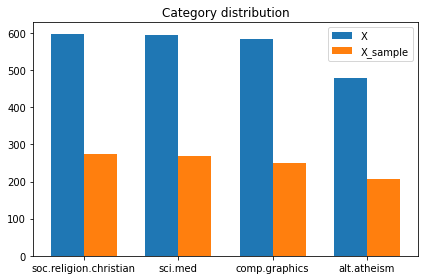

In [14]:
# Answer here
labels = X.category_name.value_counts().index.to_list()
X_counts = X.category_name.value_counts().to_list()
X_sample_counts = X_sample.category_name.value_counts().to_list()
print(labels)
print(X_counts)
print(X_sample_counts)


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, X_counts, width, label='X')
rects2 = ax.bar(x + width/2, X_sample_counts, width, label='X_sample')

# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_title('Category distribution')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NTHU-\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [18]:
# Answer here
print("Ans: Efficient way to get the last index and its word where its frequency equals to 1")
count_vect.get_feature_names()[(X_counts[4, 0:100] == 1).indices[-1]]

Ans: Efficient way to get the last index and its word where its frequency equals to 1


'01'

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

Ans: Using matplotlib build-in 'spy' function for showing heatmap for sparse matrix.


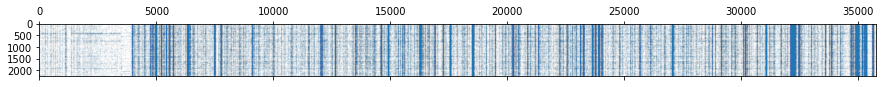

In [19]:
# Answer here
plt.figure(figsize=(15, 15))
print("Ans: Using matplotlib build-in 'spy' function for showing heatmap for sparse matrix.")
plt.spy(X_counts, markersize=0.01)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [20]:
from sklearn.decomposition import PCA

Viewing Angle 0°


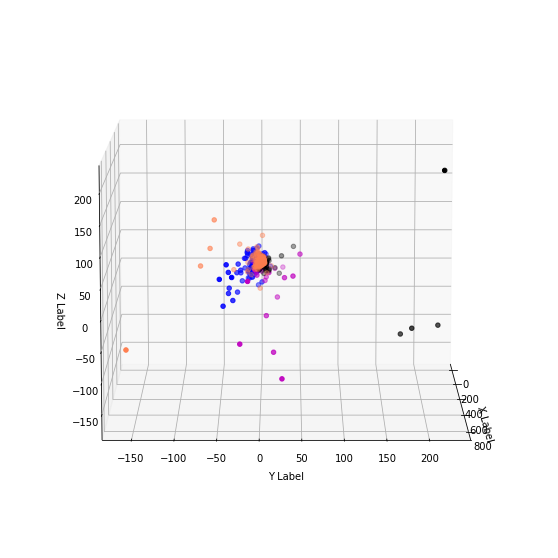

Viewing Angle 120°


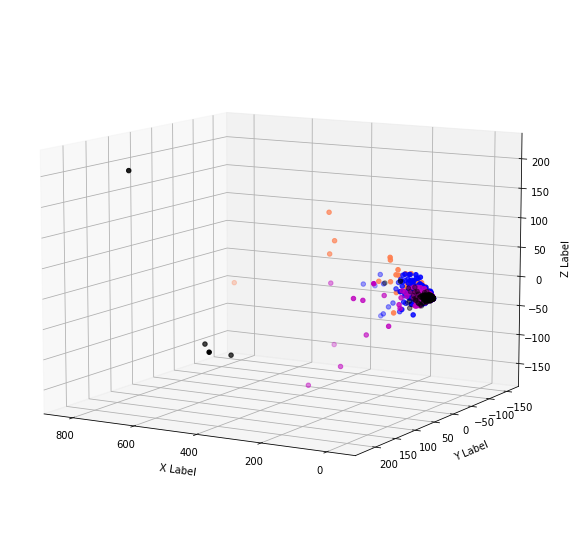

Viewing Angle 240°


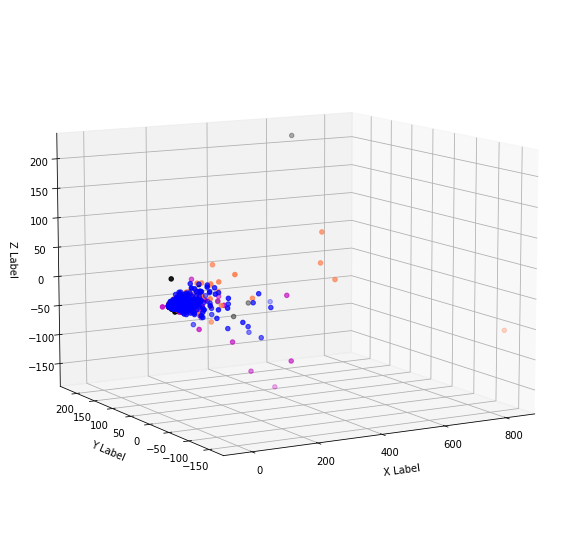

In [21]:
# Answer here
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black', 'm']

# Rotate for 3 angles: 0, 120, 240
for i in range(0,3):

    # plot
    fig = plt.figure(figsize = (25,10))
    ax = fig.add_subplot(projection='3d')

    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]

        ax.scatter(xs, ys, zs=zs, c = c, marker='o')

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nZ Label')

    angle = 0 + 120 * i
    print("Viewing Angle " + str(angle) + "°")
    ax.view_init(elev=10., azim=angle)
    plt.show()

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [22]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [23]:
# Answer here
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(x=count_vect.get_feature_names()[:300],y=term_frequencies[:300])],
    layout_title_text="Term Frequency"
)
fig

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


Ans: Select terms with at least 0.03x frequency of the most frequent term.


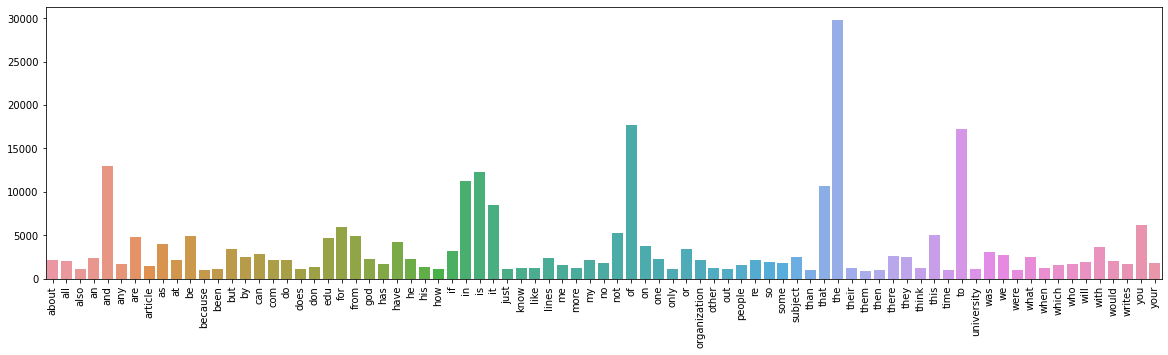

In [24]:
# Answer here
import seaborn as sns

print("Ans: Select terms with at least 0.03x frequency of the most frequent term.")
portion_of_max = 0.03
result_indices = np.where(term_frequencies >= portion_of_max * max(term_frequencies))[0]

x_terms = [count_vect.get_feature_names()[t] for t in result_indices]
y_terms = [term_frequencies[t] for t in result_indices]

plt.subplots(figsize=(20, 5))
g = sns.barplot(x=x_terms, y=y_terms)
g.set_xticklabels(x_terms, rotation = 90);

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

Ans: Sort the terms by frequecy before plotting.


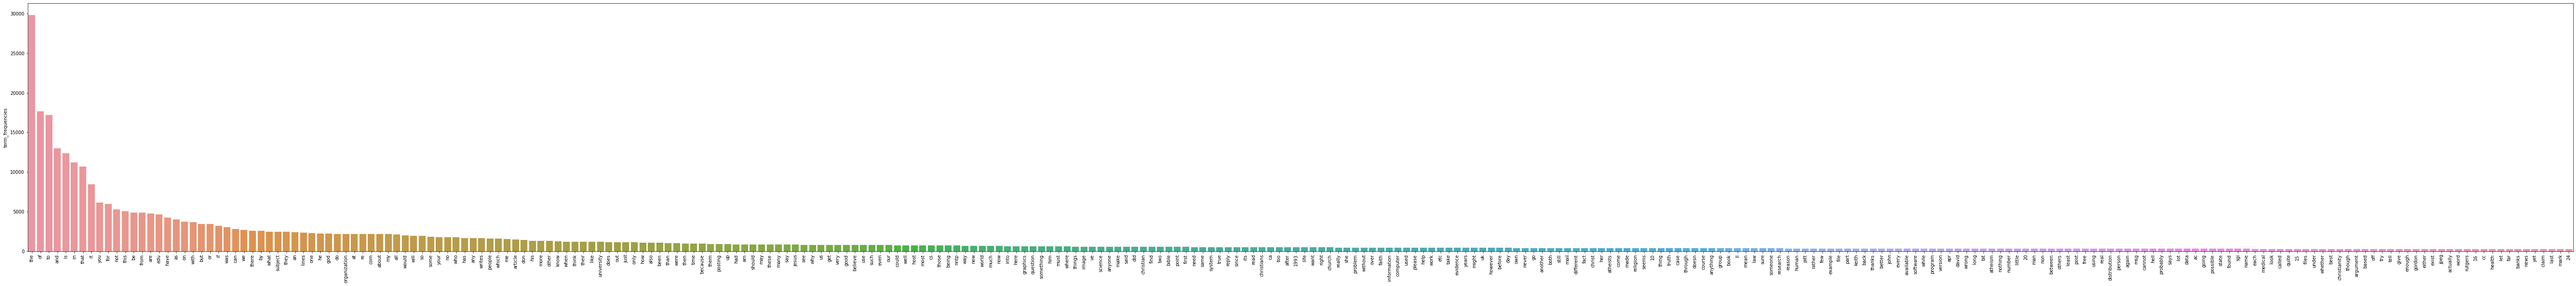

In [25]:
# Answer here
print("Ans: Sort the terms by frequecy before plotting.")
df_15 = pd.DataFrame(data=term_frequencies, index=count_vect.get_feature_names(), columns=['term_frequencies']).sort_values(by='term_frequencies',ascending=False)

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=df_15.index[:300], 
            y=df_15['term_frequencies'][:300])
g.set_xticklabels(df_15.index[:300], rotation = 90);

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [26]:
# Answer here
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb_2 = preprocessing.LabelBinarizer()
mlb_2.fit(X.category_name)
print(mlb_2.classes_)
print("Ans: It does work!")
X['bin_category_name'] = mlb_2.transform(X['category_name']).tolist()
X[0:9]

['alt.atheism' 'comp.graphics' 'sci.med' 'soc.religion.christian']
Ans: It does work!


text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   

  bin_category_name  
0      [0, 1, 0, 0]  
1      [0, 1, 0, 0]  
2      [0, 0, 0, 1]  
3      [0, 0, 0, 1]  
4      [0, 0, 0, 1]  
5      [0, 0, 0, 1]  
6      [0, 0, 0, 1]  
7      [0, 0, 1, 0]  
8      [0, 0, 1, 0]

### Second

### 2. Data Preparation

In [27]:
sentences = []
sources = []
sentiments = []
sentiment_codes = []

input_sources = ['amazon_cells', "imdb", "yelp"]

for ip_s in input_sources:
    f = open('data/sentiment labelled sentences/'+ip_s+'_labelled.txt', "r")
    doc = f.read()
    f.close()

    for record in doc.split("\n"):
        rec_split = record.split("\t")
        if len(rec_split) == 2:
            sentences.append(rec_split[0])
            sources.append(ip_s)
            sentiment_codes.append(int(rec_split[1]))
            if rec_split[1] == '1':
                sentiments.append('positive')
            elif rec_split[1] == '0':
                sentiments.append('negative')
        else:
            # print line with wrong stucture
            print(rec_split)

['']
['']
['']


In [28]:
set(sentiments)

{'negative', 'positive'}

In [29]:
set(sentiment_codes)

{0, 1}

In [30]:
len(sentences)

3000

In [31]:
len(sources)

3000

In [32]:
len(sentiments)

3000

In [33]:
len(sentiment_codes)

3000

##### We can also print an example from the subset

In [34]:
print(sentences[0])

So there is no way for me to plug it in here in the US unless I go by a converter.


In [35]:
print(sentiments[0])

negative


In [36]:
print(sentiment_codes[0])

0


In [37]:
print(sentiment_codes[:10])

[0, 1, 1, 0, 1, 0, 0, 1, 0, 0]


In [38]:
for t in sentiments[:10]:
    print(t)

negative
positive
positive
negative
positive
negative
negative
positive
negative
negative


In [39]:
for t in sentences[:3]:
    print(t)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


### 3. Data Transformation

In [40]:
sentences[0:2]

['So there is no way for me to plug it in here in the US unless I go by a converter.',
 'Good case, Excellent value.']

In [41]:
sentiment_codes

[0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,


In [42]:
X = pd.DataFrame(data=sentences,columns=['sentence'])

In [43]:
len(X)

3000

In [44]:
X[0:2]

sentence
0  So there is no way for me to plug it in here i...
1                        Good case, Excellent value.

In [45]:
for t in X["sentence"][:3]:
    print(t)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


#### Adding Columns

In [46]:
# add category to the dataframe
X['source'] = sources

In [47]:
X['sentiment_code'] = sentiment_codes

In [48]:
X['sentiment'] = sentiments

In [49]:
X[0:10]

sentence        source  \
0  So there is no way for me to plug it in here i...  amazon_cells   
1                        Good case, Excellent value.  amazon_cells   
2                             Great for the jawbone.  amazon_cells   
3  Tied to charger for conversations lasting more...  amazon_cells   
4                                  The mic is great.  amazon_cells   
5  I have to jiggle the plug to get it to line up...  amazon_cells   
6  If you have several dozen or several hundred c...  amazon_cells   
7        If you are Razr owner...you must have this!  amazon_cells   
8                Needless to say, I wasted my money.  amazon_cells   
9                   What a waste of money and time!.  amazon_cells   

   sentiment_code sentiment  
0               0  negative  
1               1  positive  
2               1  positive  
3               0  negative  
4               1  positive  
5               0  negative  
6               0  negative  
7               1  positive  
8               0  negative  
9               0  negative

#### 3.2 Familiarizing yourself with the Data

In [50]:
# a simple query
X[0:10][["sentence", "sentiment"]]

sentence sentiment
0  So there is no way for me to plug it in here i...  negative
1                        Good case, Excellent value.  positive
2                             Great for the jawbone.  positive
3  Tied to charger for conversations lasting more...  negative
4                                  The mic is great.  positive
5  I have to jiggle the plug to get it to line up...  negative
6  If you have several dozen or several hundred c...  negative
7        If you are Razr owner...you must have this!  positive
8                Needless to say, I wasted my money.  negative
9                   What a waste of money and time!.  negative

##### Let's query the last 10 records

In [51]:
X[-10:]

sentence source  \
2990  The refried beans that came with my meal were ...   yelp   
2991         Spend your money and time some place else.   yelp   
2992  A lady at the table next to us found a live gr...   yelp   
2993            the presentation of the food was awful.   yelp   
2994           I can't tell you how disappointed I was.   yelp   
2995  I think food should have flavor and texture an...   yelp   
2996                           Appetite instantly gone.   yelp   
2997  Overall I was not impressed and would not go b...   yelp   
2998  The whole experience was underwhelming, and I ...   yelp   
2999  Then, as if I hadn't wasted enough of my life ...   yelp   

      sentiment_code sentiment  
2990               0  negative  
2991               0  negative  
2992               0  negative  
2993               0  negative  
2994               0  negative  
2995               0  negative  
2996               0  negative  
2997               0  negative  
2998               0  negative  
2999               0  negative

In [52]:
# using loc (by position)
X.iloc[::10, 0:2][0:10]

sentence        source
0   So there is no way for me to plug it in here i...  amazon_cells
10                    And the sound quality is great.  amazon_cells
20  I went on Motorola's website and followed all ...  amazon_cells
30  This is a simple little phone to use, but the ...  amazon_cells
40  It has a great camera thats 2MP, and the pics ...  amazon_cells
50  Not loud enough and doesn't turn on like it sh...  amazon_cells
60  Essentially you can forget Microsoft's tech su...  amazon_cells
70                                  Mic Doesn't work.  amazon_cells
80      I wear it everyday and it holds up very well.  amazon_cells
90  For a product that costs as much as this one d...  amazon_cells

In [53]:
# using loc (by label)
X.loc[::10, 'sentence'][0:10]

0     So there is no way for me to plug it in here i...
10                      And the sound quality is great.
20    I went on Motorola's website and followed all ...
30    This is a simple little phone to use, but the ...
40    It has a great camera thats 2MP, and the pics ...
50    Not loud enough and doesn't turn on like it sh...
60    Essentially you can forget Microsoft's tech su...
70                                    Mic Doesn't work.
80        I wear it everyday and it holds up very well.
90    For a product that costs as much as this one d...
Name: sentence, dtype: object

In [54]:
# standard query (Cannot simultaneously select rows and columns)
X[::10][0:10]

sentence        source  \
0   So there is no way for me to plug it in here i...  amazon_cells   
10                    And the sound quality is great.  amazon_cells   
20  I went on Motorola's website and followed all ...  amazon_cells   
30  This is a simple little phone to use, but the ...  amazon_cells   
40  It has a great camera thats 2MP, and the pics ...  amazon_cells   
50  Not loud enough and doesn't turn on like it sh...  amazon_cells   
60  Essentially you can forget Microsoft's tech su...  amazon_cells   
70                                  Mic Doesn't work.  amazon_cells   
80      I wear it everyday and it holds up very well.  amazon_cells   
90  For a product that costs as much as this one d...  amazon_cells   

    sentiment_code sentiment  
0                0  negative  
10               1  positive  
20               0  negative  
30               0  negative  
40               1  positive  
50               0  negative  
60               0  negative  
70               0  negative  
80               1  positive  
90               0  negative

In [55]:
# select record with 'sentiment_code' equals to 1
X.loc[X['sentiment_code']==1,'sentence':'sentiment_code']

sentence        source  \
1                           Good case, Excellent value.  amazon_cells   
2                                Great for the jawbone.  amazon_cells   
4                                     The mic is great.  amazon_cells   
7           If you are Razr owner...you must have this!  amazon_cells   
10                      And the sound quality is great.  amazon_cells   
...                                                 ...           ...   
2899                       Overall, a great experience.          yelp   
2901  Their regular toasted bread was equally satisf...          yelp   
2907  The chips and sals a here is amazing!!!!!!!!!!...          yelp   
2909              This is my new fav Vegas buffet spot.          yelp   
2922  Every time I eat here, I see caring teamwork t...          yelp   

      sentiment_code  
1                  1  
2                  1  
4                  1  
7                  1  
10                 1  
...              ...  
2899               1  
2901               1  
2907               1  
2909               1  
2922               1  

[1500 rows x 3 columns]

In [56]:
# select record with 'sentiment' equals to positive and show top 5 record of every 10
X.loc[X['sentiment']=='positive'].iloc[::10,:][0:5]

sentence        source  \
1                         Good case, Excellent value.  amazon_cells   
21  I bought this to use with my Kindle Fire and a...  amazon_cells   
44                       Excellent bluetooth headset.  amazon_cells   
61  I really recommend this faceplates since it lo...  amazon_cells   
78  I love this phone , It is very handy and has a...  amazon_cells   

    sentiment_code sentiment  
1                1  positive  
21               1  positive  
44               1  positive  
61               1  positive  
78               1  positive

### 4. Data Mining using Pandas

#### 4.1 Missing Values

In [57]:
X.isnull()

sentence  source  sentiment_code  sentiment
0        False   False           False      False
1        False   False           False      False
2        False   False           False      False
3        False   False           False      False
4        False   False           False      False
...        ...     ...             ...        ...
2995     False   False           False      False
2996     False   False           False      False
2997     False   False           False      False
2998     False   False           False      False
2999     False   False           False      False

[3000 rows x 4 columns]

In [58]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence                              source  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                       sentiment_code                           sentiment  
0  The amoung of missing records is:   The amoung of missing records is:   
1                                   0                                   0

In [59]:
X.isnull().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [60]:
dummy_series = pd.Series(["dummy_record", 1], index=["sentence", "sentiment_code"])

In [61]:
dummy_series

sentence          dummy_record
sentiment_code               1
dtype: object

In [62]:
result_with_series = X.append(dummy_series, ignore_index=True)

In [63]:
# check if the records was commited into result
len(result_with_series)

3001

In [64]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence                              source  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   1   

                       sentiment_code                           sentiment  
0  The amoung of missing records is:   The amoung of missing records is:   
1                                   0                                   1

In [65]:
# dummy record as dictionary format
dummy_dict = [{'sentence': 'dummy_record',
               'sentiment_code': 1
              }]

In [66]:
X = X.append(dummy_dict, ignore_index=True)

In [67]:
len(X)

3001

In [68]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence                              source  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   1   

                       sentiment_code                           sentiment  
0  The amoung of missing records is:   The amoung of missing records is:   
1                                   0                                   1

In [69]:
X.dropna(inplace=True)

In [70]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence                              source  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                       sentiment_code                           sentiment  
0  The amoung of missing records is:   The amoung of missing records is:   
1                                   0                                   0

In [71]:
len(X)

3000

#### 4.2 Dealing with Duplicate Data

In [72]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [73]:
sum(X.duplicated())

17

In [74]:
sum(X.duplicated('sentence'))

17

In [75]:
X.drop_duplicates(keep='first', inplace=True) # inplace applies changes directly on our dataframe

In [76]:
len(X)

2983

In [77]:
sum(X.duplicated())

0

In [78]:
sum(X.duplicated('sentence'))

0

### 5.  Data Preprocessing

#### 5.1 Sampling

In [79]:
X_sample = X.sample(n=1000) #random state

In [80]:
len(X_sample)

1000

In [81]:
X_sample[0:4]

sentence        source  \
608   It is cheap, and it feel and look just as cheap.  amazon_cells   
531                  They refuse to refund or replace.  amazon_cells   
410                I'll be looking for a new earpiece.  amazon_cells   
2551                                    Nice ambiance.          yelp   

      sentiment_code sentiment  
608                0  negative  
531                0  negative  
410                0  negative  
2551               1  positive

In [82]:
set(sentiments)

{'negative', 'positive'}

negative    1493
positive    1490
Name: sentiment, dtype: int64


<AxesSubplot:title={'center':'Sentiment distribution'}>

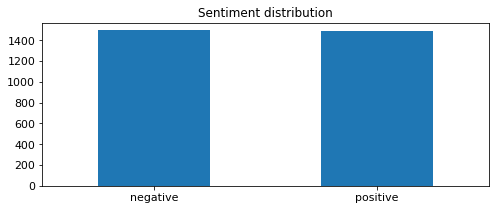

In [83]:
print(X.sentiment.value_counts())

# plot barchart for X_sample
X.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'Sentiment distribution',
                                    ylim = [0, X.sentiment.value_counts().max() * 1.05],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

negative    502
positive    498
Name: sentiment, dtype: int64


<AxesSubplot:title={'center':'Sentiment distribution'}>

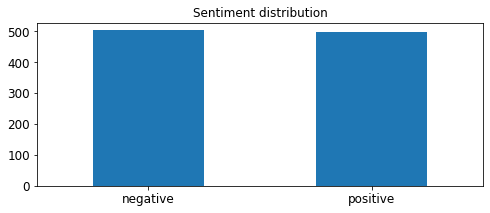

In [84]:
print(X_sample.sentiment.value_counts())

# plot barchart for X_sample
X_sample.sentiment.value_counts().plot(kind = 'bar',
                                           title = 'Sentiment distribution',
                                           ylim = [0, X_sample.sentiment.value_counts().max() * 1.05], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

['negative', 'positive']
[1493, 1490]
[502, 498]


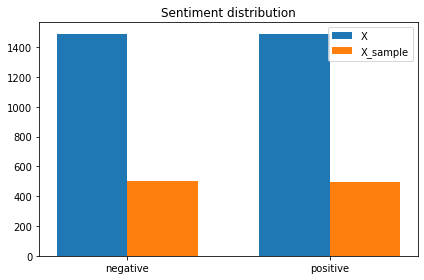

In [85]:
# Answer here
labels = X.sentiment.value_counts().index.to_list()
X_counts = X.sentiment.value_counts().to_list()
X_sample_counts = X_sample.sentiment.value_counts().to_list()
print(labels)
print(X_counts)
print(X_sample_counts)


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, X_counts, width, label='X')
rects2 = ax.bar(x + width/2, X_sample_counts, width, label='X_sample')

# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_title('Sentiment distribution')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

#### 5.2 Feature Creation

In [86]:
# takes a like a minute or two to process
X['unigrams'] = X['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [87]:
X[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [88]:
X[0:4]

sentence        source  \
0  So there is no way for me to plug it in here i...  amazon_cells   
1                        Good case, Excellent value.  amazon_cells   
2                             Great for the jawbone.  amazon_cells   
3  Tied to charger for conversations lasting more...  amazon_cells   

   sentiment_code sentiment                                           unigrams  
0               0  negative  [So, there, is, no, way, for, me, to, plug, it...  
1               1  positive               [Good, case, ,, Excellent, value, .]  
2               1  positive                      [Great, for, the, jawbone, .]  
3               0  negative  [Tied, to, charger, for, conversations, lastin...

In [89]:
list(X[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

#### 5.3 Feature subset selection

In [90]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.sentence)

In [91]:
analyze = count_vect.build_analyzer()
analyze("Hello World!")

['hello', 'world']

In [92]:
analyze(X['sentence'][0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [93]:
word_count = []
for sentence in X['sentence']:
    word_count.append(len(analyze(sentence)))
X['word_count'] = word_count
X

sentence        source  \
0     So there is no way for me to plug it in here i...  amazon_cells   
1                           Good case, Excellent value.  amazon_cells   
2                                Great for the jawbone.  amazon_cells   
3     Tied to charger for conversations lasting more...  amazon_cells   
4                                     The mic is great.  amazon_cells   
...                                                 ...           ...   
2995  I think food should have flavor and texture an...          yelp   
2996                           Appetite instantly gone.          yelp   
2997  Overall I was not impressed and would not go b...          yelp   
2998  The whole experience was underwhelming, and I ...          yelp   
2999  Then, as if I hadn't wasted enough of my life ...          yelp   

      sentiment_code sentiment  \
0                  0  negative   
1                  1  positive   
2                  1  positive   
3                  0  negative   
4                  1  positive   
...              ...       ...   
2995               0  negative   
2996               0  negative   
2997               0  negative   
2998               0  negative   
2999               0  negative   

                                               unigrams  word_count  
0     [So, there, is, no, way, for, me, to, plug, it...          19  
1                  [Good, case, ,, Excellent, value, .]           4  
2                         [Great, for, the, jawbone, .]           4  
3     [Tied, to, charger, for, conversations, lastin...          12  
4                              [The, mic, is, great, .]           4  
...                                                 ...         ...  
2995  [I, think, food, should, have, flavor, and, te...          11  
2996                     [Appetite, instantly, gone, .]           3  
2997  [Overall, I, was, not, impressed, and, would, ...           9  
2998  [The, whole, experience, was, underwhelming, ,...          16  
2999  [Then, ,, as, if, I, had, n't, wasted, enough,...          27  

[2983 rows x 6 columns]

In [94]:
# We can check the shape of this matrix by:
X_counts.shape

(2983, 5159)

In [95]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [96]:
X[0:5]

sentence        source  \
0  So there is no way for me to plug it in here i...  amazon_cells   
1                        Good case, Excellent value.  amazon_cells   
2                             Great for the jawbone.  amazon_cells   
3  Tied to charger for conversations lasting more...  amazon_cells   
4                                  The mic is great.  amazon_cells   

   sentiment_code sentiment  \
0               0  negative   
1               1  positive   
2               1  positive   
3               0  negative   
4               1  positive   

                                            unigrams  word_count  
0  [So, there, is, no, way, for, me, to, plug, it...          19  
1               [Good, case, ,, Excellent, value, .]           4  
2                      [Great, for, the, jawbone, .]           4  
3  [Tied, to, charger, for, conversations, lastin...          12  
4                           [The, mic, is, great, .]           4

In [97]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [98]:
count_vect.get_feature_names()[(X_counts[3, 0:100] == 1).indices[-1]]

'45'

In [99]:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [100]:
count_vect.transform(['00 Something completely new.']).toarray()

array([[1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [101]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [102]:
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980']

In [103]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [104]:
plot_z = X_counts[0:20, 0:20].toarray()

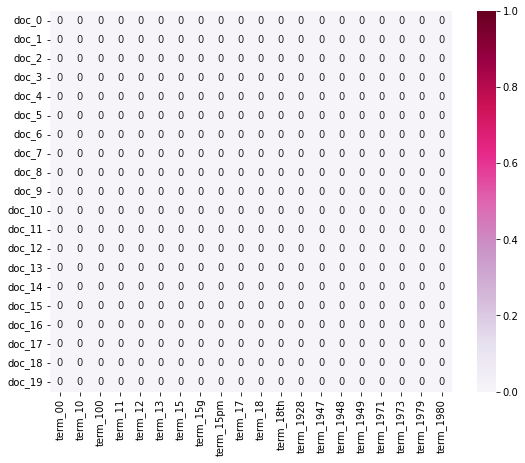

In [105]:
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

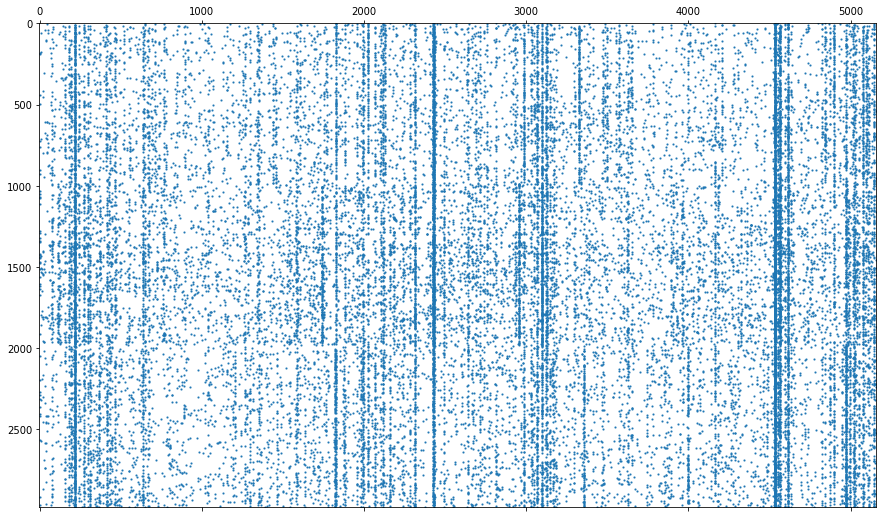

In [106]:
plt.figure(figsize=(15, 10))
# Visualize sparse matrix
plt.spy(X_counts, markersize=1)

#### 5.4 Dimensionality Reduction

In [107]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

In [108]:
X_reduced.shape

(2983, 2)

In [109]:
list(set(sentiments))

['negative', 'positive']

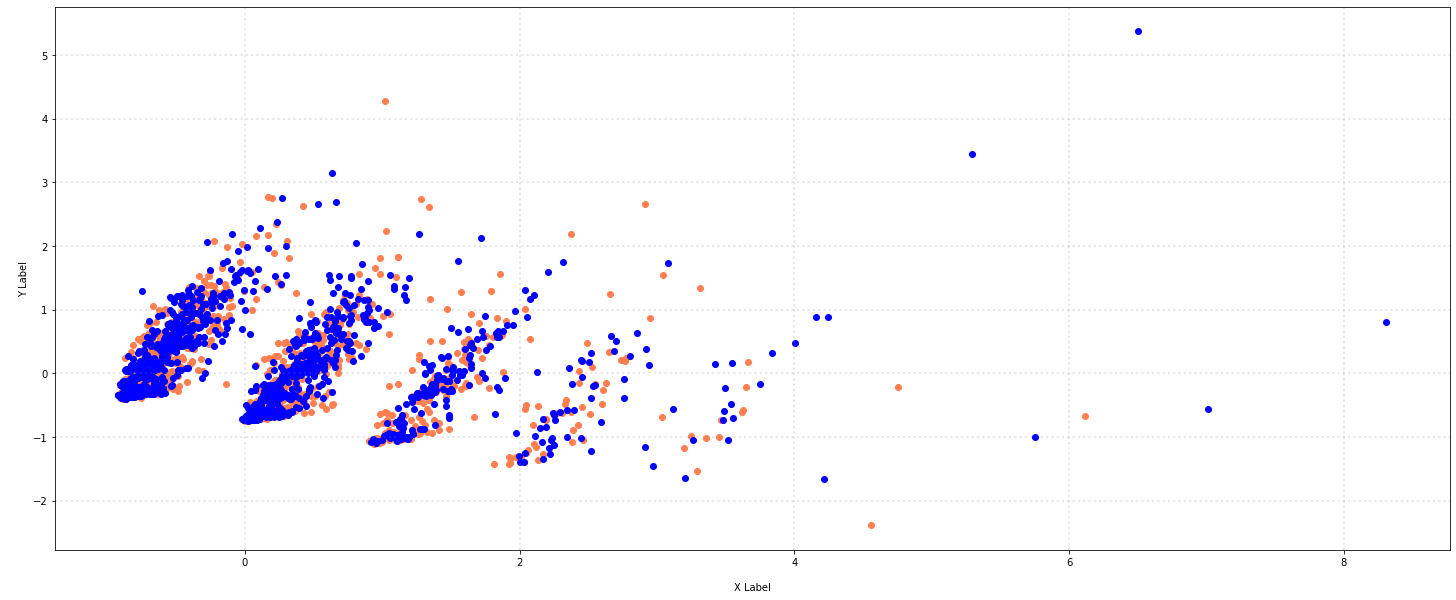

In [110]:
col = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, sentiment in zip(col, list(set(sentiments))):
    xs = X_reduced[X['sentiment'] == sentiment].T[0]
    ys = X_reduced[X['sentiment'] == sentiment].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

Viewing Angle 0°


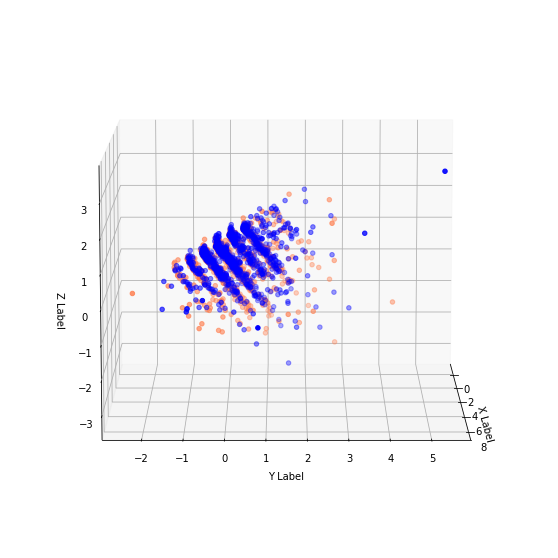

Viewing Angle 120°


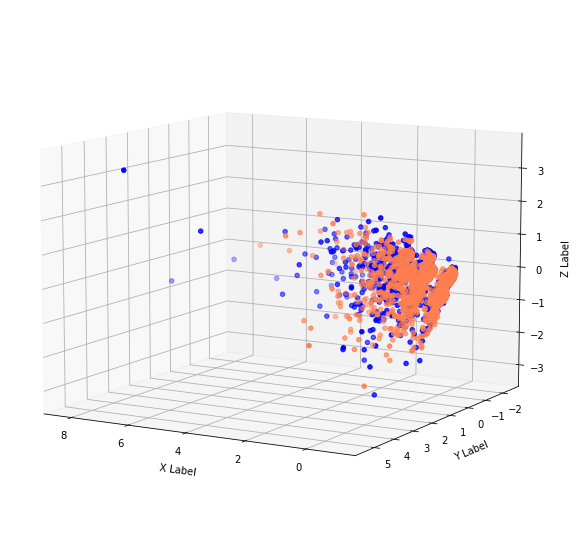

Viewing Angle 240°


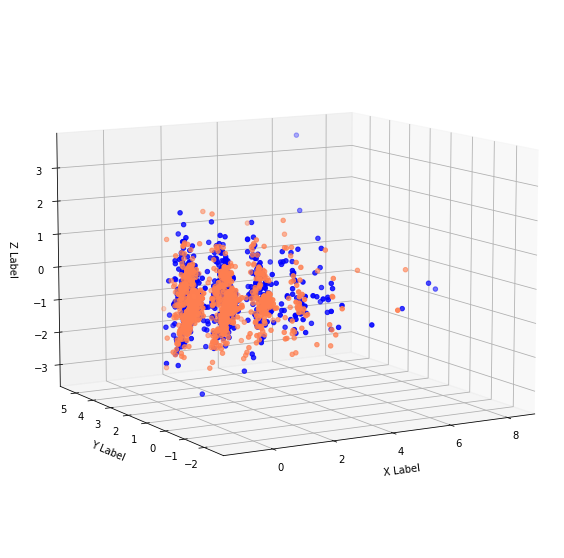

In [111]:
# Answer here
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

col = ['coral', 'blue']

# Rotate for 3 viewing angles: 0, 120, 240
for i in range(0,3):

    # plot
    fig = plt.figure(figsize = (25,10))
    ax = fig.add_subplot(projection='3d')

    for c, sentiment in zip(col, list(set(sentiments))):
        xs = X_reduced[X['sentiment'] == sentiment].T[0]
        ys = X_reduced[X['sentiment'] == sentiment].T[1]
        zs = X_reduced[X['sentiment'] == sentiment].T[2]

        ax.scatter(xs, ys, zs=zs, c = c, marker='o')

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nZ Label')

    angle = 0 + 120 * i
    print("Viewing Angle " + str(angle) + "°")
    ax.view_init(elev=10., azim=angle)
    plt.show()

#### 5.5 Atrribute Transformation / Aggregation

In [112]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [113]:
term_frequencies[0]

1

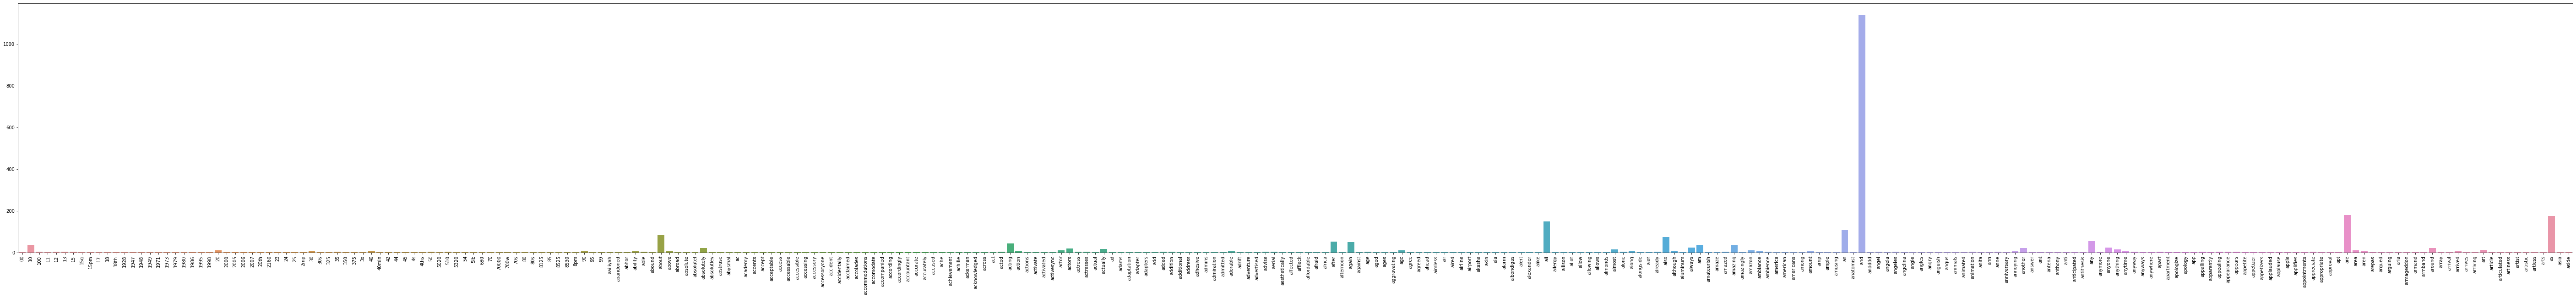

In [114]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [115]:
# Answer here
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(x=count_vect.get_feature_names()[:300],y=term_frequencies[:300])],
    layout_title_text="Term Frequency"
)
fig

Select terms with at least 0.03x frequency of the most frequent term.


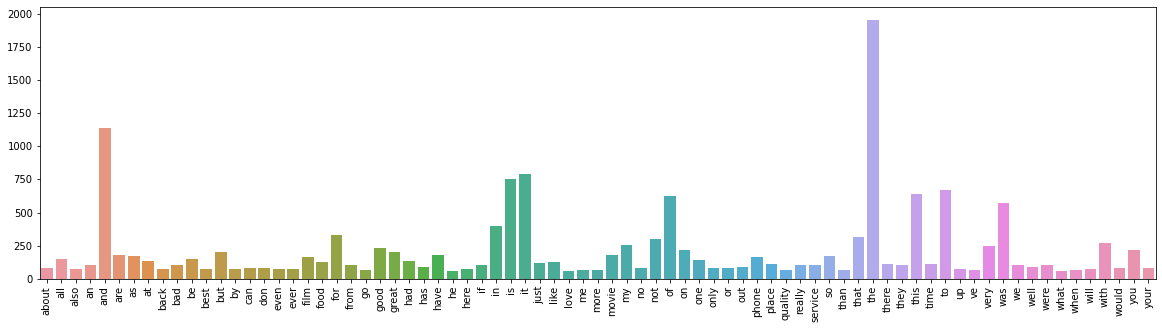

In [116]:
print("Select terms with at least 0.03x frequency of the most frequent term.")
portion_of_max = 0.03
result_indices = np.where(term_frequencies >= portion_of_max * max(term_frequencies))[0]

x_terms = [count_vect.get_feature_names()[t] for t in result_indices]
y_terms = [term_frequencies[t] for t in result_indices]

plt.subplots(figsize=(20, 5))
g = sns.barplot(x=x_terms, y=y_terms)
g.set_xticklabels(x_terms, rotation = 90);

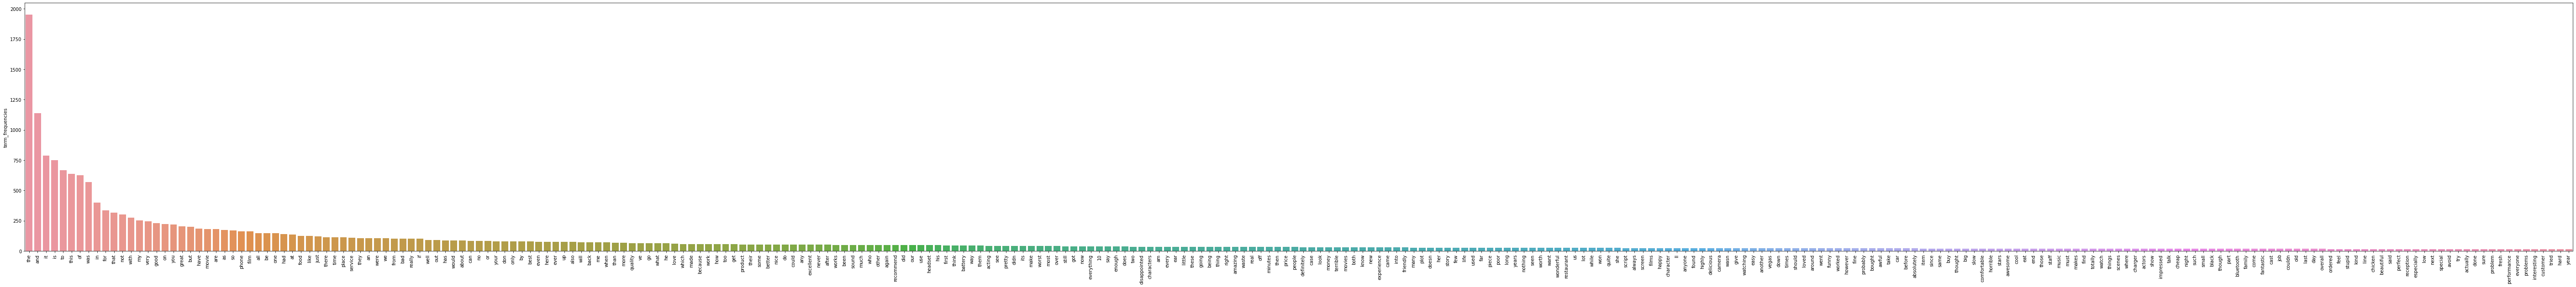

In [117]:
# Answer here
df_15 = pd.DataFrame(data=term_frequencies, index=count_vect.get_feature_names(), columns=['term_frequencies']).sort_values(by='term_frequencies',ascending=False)
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=df_15.index[:300], 
            y=df_15['term_frequencies'][:300])
g.set_xticklabels(df_15.index[:300], rotation = 90);

In [118]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

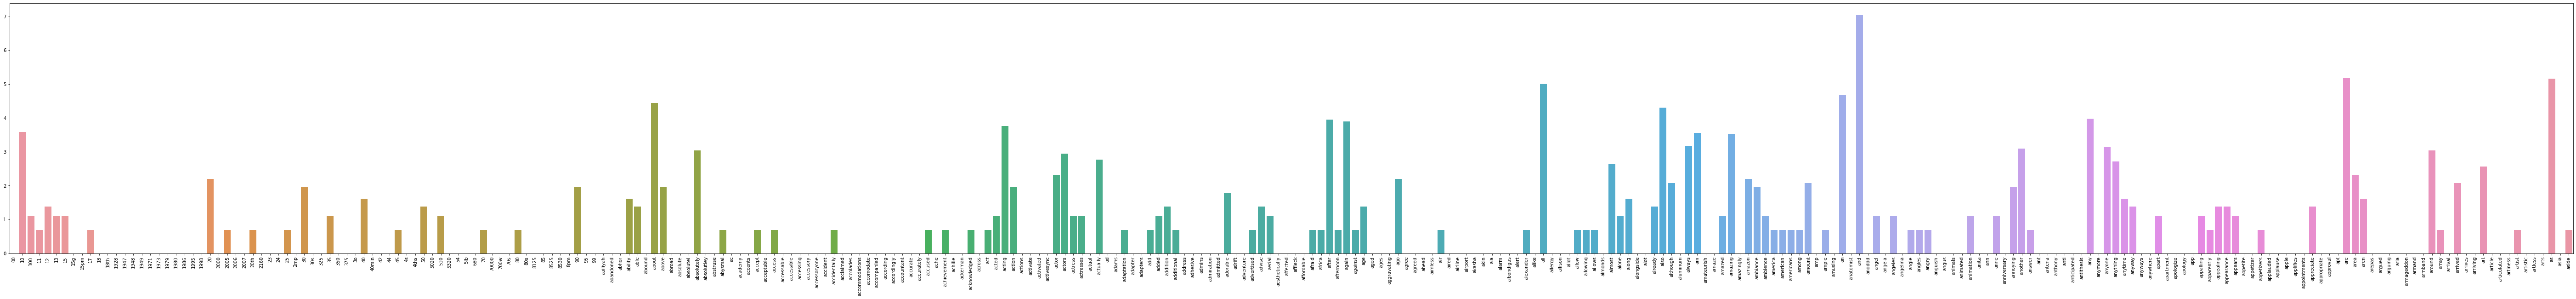

In [119]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

#### 5.6 Discretization and Binarization

In [120]:
mlb = preprocessing.LabelBinarizer()

In [121]:
mlb.fit(X.sentiment_code)

LabelBinarizer()

In [122]:
mlb.classes_

array([0, 1], dtype=int64)

In [123]:
X['bin_sentiment_code'] = mlb.transform(X['sentiment_code']).tolist()

In [124]:
X[0:9]

sentence        source  \
0  So there is no way for me to plug it in here i...  amazon_cells   
1                        Good case, Excellent value.  amazon_cells   
2                             Great for the jawbone.  amazon_cells   
3  Tied to charger for conversations lasting more...  amazon_cells   
4                                  The mic is great.  amazon_cells   
5  I have to jiggle the plug to get it to line up...  amazon_cells   
6  If you have several dozen or several hundred c...  amazon_cells   
7        If you are Razr owner...you must have this!  amazon_cells   
8                Needless to say, I wasted my money.  amazon_cells   

   sentiment_code sentiment  \
0               0  negative   
1               1  positive   
2               1  positive   
3               0  negative   
4               1  positive   
5               0  negative   
6               0  negative   
7               1  positive   
8               0  negative   

                                            unigrams  word_count  \
0  [So, there, is, no, way, for, me, to, plug, it...          19   
1               [Good, case, ,, Excellent, value, .]           4   
2                      [Great, for, the, jawbone, .]           4   
3  [Tied, to, charger, for, conversations, lastin...          12   
4                           [The, mic, is, great, .]           4   
5  [I, have, to, jiggle, the, plug, to, get, it, ...          16   
6  [If, you, have, several, dozen, or, several, h...          21   
7  [If, you, are, Razr, owner, ..., you, must, ha...           9   
8    [Needless, to, say, ,, I, wasted, my, money, .]           6   

  bin_sentiment_code  
0                [0]  
1                [1]  
2                [1]  
3                [0]  
4                [1]  
5                [0]  
6                [0]  
7                [1]  
8                [0]

In [125]:
mlb_2 = preprocessing.LabelBinarizer()
mlb_2.fit(X.sentiment)
print(mlb_2.classes_)
X['bin_sentiment'] = mlb_2.transform(X['sentiment']).tolist()
print("Number of records of inconsistancy btn bin_sentiment_code and bin_sentiment: " + str(len(X.loc[X['bin_sentiment_code']!=X['bin_sentiment']])))
X[0:9]

['negative' 'positive']
Number of records of inconsistancy btn bin_sentiment_code and bin_sentiment: 0


sentence        source  \
0  So there is no way for me to plug it in here i...  amazon_cells   
1                        Good case, Excellent value.  amazon_cells   
2                             Great for the jawbone.  amazon_cells   
3  Tied to charger for conversations lasting more...  amazon_cells   
4                                  The mic is great.  amazon_cells   
5  I have to jiggle the plug to get it to line up...  amazon_cells   
6  If you have several dozen or several hundred c...  amazon_cells   
7        If you are Razr owner...you must have this!  amazon_cells   
8                Needless to say, I wasted my money.  amazon_cells   

   sentiment_code sentiment  \
0               0  negative   
1               1  positive   
2               1  positive   
3               0  negative   
4               1  positive   
5               0  negative   
6               0  negative   
7               1  positive   
8               0  negative   

                                            unigrams  word_count  \
0  [So, there, is, no, way, for, me, to, plug, it...          19   
1               [Good, case, ,, Excellent, value, .]           4   
2                      [Great, for, the, jawbone, .]           4   
3  [Tied, to, charger, for, conversations, lastin...          12   
4                           [The, mic, is, great, .]           4   
5  [I, have, to, jiggle, the, plug, to, get, it, ...          16   
6  [If, you, have, several, dozen, or, several, h...          21   
7  [If, you, are, Razr, owner, ..., you, must, ha...           9   
8    [Needless, to, say, ,, I, wasted, my, money, .]           6   

  bin_sentiment_code bin_sentiment  
0                [0]           [0]  
1                [1]           [1]  
2                [1]           [1]  
3                [0]           [0]  
4                [1]           [1]  
5                [0]           [0]  
6                [0]           [0]  
7                [1]           [1]  
8                [0]           [0]

### 6. Data Exploration

In [126]:
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [127]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["Not loud enough and doesn't turn on like it should."]
['Integrated seamlessly with the Motorola RAZR phone.']
['I Was Hoping for More.']


In [128]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [129]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


### Third

- Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 

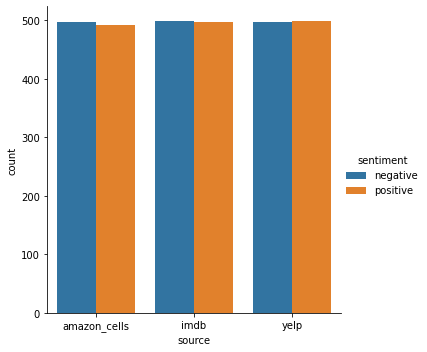

In [130]:
ax = sns.catplot(x='source', hue='sentiment', data=X, kind="count")

<AxesSubplot:xlabel='source'>

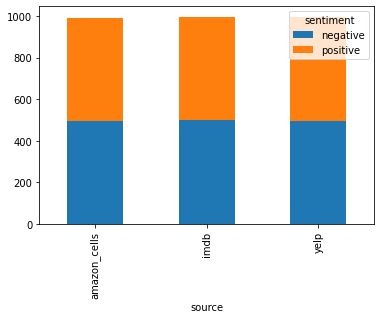

In [131]:
pd.crosstab(X['source'],X['sentiment']).plot.bar(stacked=True)

In [132]:
import plotly.express as px

In [133]:
fig = px.treemap(X, title='Treemap chart by sources, sentiment and word counts.',
                 path=['source', 'sentiment'], color='word_count', color_continuous_scale=px.colors.sequential.GnBu)
fig.show()

In [134]:
fig = px.bar(X, x='word_count', y='source', template='plotly_white', orientation='h',
             labels={'sentiment': 'Sentiment', 'word_count': 'Accumulated Word Counts', 'source': 'Source'},
             color='sentiment', color_discrete_sequence=px.colors.qualitative.Safe)
fig.update_layout(font=dict(size=10, color='DarkSlateGray'))
fig.show()

- Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .

In [135]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [136]:
vectorizer = TfidfVectorizer()

In [137]:
X_tfidf = vectorizer.fit_transform(X['sentence'])

In [138]:
vectorizer.get_feature_names()

['00',
 '10',
 '100',
 '11',
 '12',
 '13',
 '15',
 '15g',
 '15pm',
 '17',
 '18',
 '18th',
 '1928',
 '1947',
 '1948',
 '1949',
 '1971',
 '1973',
 '1979',
 '1980',
 '1986',
 '1995',
 '1998',
 '20',
 '2000',
 '2005',
 '2006',
 '2007',
 '20th',
 '2160',
 '23',
 '24',
 '25',
 '2mp',
 '30',
 '30s',
 '325',
 '35',
 '350',
 '375',
 '3o',
 '40',
 '40min',
 '42',
 '44',
 '45',
 '4s',
 '4ths',
 '50',
 '5020',
 '510',
 '5320',
 '54',
 '5lb',
 '680',
 '70',
 '70000',
 '700w',
 '70s',
 '80',
 '80s',
 '8125',
 '85',
 '8525',
 '8530',
 '8pm',
 '90',
 '95',
 '99',
 'aailiyah',
 'abandoned',
 'abhor',
 'ability',
 'able',
 'abound',
 'about',
 'above',
 'abroad',
 'absolute',
 'absolutel',
 'absolutely',
 'absolutley',
 'abstruse',
 'abysmal',
 'ac',
 'academy',
 'accents',
 'accept',
 'acceptable',
 'access',
 'accessable',
 'accessible',
 'accessing',
 'accessory',
 'accessoryone',
 'accident',
 'accidentally',
 'acclaimed',
 'accolades',
 'accommodations',
 'accomodate',
 'accompanied',
 'according',

In [139]:
print(X_tfidf.shape)

(2983, 5159)


In [140]:
df_tfidf = pd.DataFrame(X_tfidf.toarray(),columns=vectorizer.get_feature_names())
print("TFIDF")
df_tfidf

TFIDF


00   10  100   11   12   13   15  15g  15pm   17  ...  yucky  yukon  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...    ...    ...   
2978  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2979  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2980  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2981  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2982  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   

      yum  yummy  yun  z500a  zero  zillion  zombie  zombiez  
0     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
1     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
3     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
4     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
...   ...    ...  ...    ...   ...      ...     ...      ...  
2978  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2979  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2980  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2981  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2982  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  

[2983 rows x 5159 columns]

In [141]:
df_tfidf.iloc[0:5, 0:50]

00   10  100   11   12   13   15  15g  15pm   17  ...   3o   40  40min  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...  0.0  0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...  0.0  0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...  0.0  0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...  0.0  0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...  0.0  0.0    0.0   

    42   44        45   4s  4ths   50  5020  
0  0.0  0.0  0.000000  0.0   0.0  0.0   0.0  
1  0.0  0.0  0.000000  0.0   0.0  0.0   0.0  
2  0.0  0.0  0.000000  0.0   0.0  0.0   0.0  
3  0.0  0.0  0.358602  0.0   0.0  0.0   0.0  
4  0.0  0.0  0.000000  0.0   0.0  0.0   0.0  

[5 rows x 50 columns]

In [142]:
pd.DataFrame([vectorizer.idf_], columns=vectorizer.get_feature_names())

00        10       100        11        12        13        15  \
0  8.307873  5.599823  7.614726  7.902408  7.391582  7.614726  7.614726   

        15g      15pm        17  ...     yucky     yukon       yum     yummy  \
0  8.307873  8.307873  7.902408  ...  8.307873  8.307873  8.307873  7.391582   

        yun     z500a     zero   zillion    zombie   zombiez  
0  8.307873  8.307873  7.20926  8.307873  7.902408  8.307873  

[1 rows x 5159 columns]

- Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).

In [143]:
df_freq = pd.DataFrame(X_counts.toarray(),columns=vectorizer.get_feature_names())
print("Word Frequency")
df_freq

Word Frequency


00  10  100  11  12  13  15  15g  15pm  17  ...  yucky  yukon  yum  \
0      0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
1      0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
2      0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
3      0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
4      0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
...   ..  ..  ...  ..  ..  ..  ..  ...   ...  ..  ...    ...    ...  ...   
2978   0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
2979   0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
2980   0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
2981   0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
2982   0   0    0   0   0   0   0    0     0   0  ...      0      0    0   

      yummy  yun  z500a  zero  zillion  zombie  zombiez  
0         0    0      0     0        0       0        0  
1         0    0      0     0        0       0        0  
2         0    0      0     0        0       0        0  
3         0    0      0     0        0       0        0  
4         0    0      0     0        0       0        0  
...     ...  ...    ...   ...      ...     ...      ...  
2978      0    0      0     0        0       0        0  
2979      0    0      0     0        0       0        0  
2980      0    0      0     0        0       0        0  
2981      0    0      0     0        0       0        0  
2982      0    0      0     0        0       0        0  

[2983 rows x 5159 columns]

In [144]:
df_freq.iloc[0:5, 0:50]

00  10  100  11  12  13  15  15g  15pm  17  ...  3o  40  40min  42  44  45  \
0   0   0    0   0   0   0   0    0     0   0  ...   0   0      0   0   0   0   
1   0   0    0   0   0   0   0    0     0   0  ...   0   0      0   0   0   0   
2   0   0    0   0   0   0   0    0     0   0  ...   0   0      0   0   0   0   
3   0   0    0   0   0   0   0    0     0   0  ...   0   0      0   0   0   1   
4   0   0    0   0   0   0   0    0     0   0  ...   0   0      0   0   0   0   

   4s  4ths  50  5020  
0   0     0   0     0  
1   0     0   0     0  
2   0     0   0     0  
3   0     0   0     0  
4   0     0   0     0  

[5 rows x 50 columns]

In [145]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [146]:
mnb_tfidf = MultinomialNB()
gnb_tfidf = GaussianNB()
mnb_freq = MultinomialNB()
gnb_freq = GaussianNB()

mnb_tfidf_score = cross_val_score(mnb_tfidf, df_tfidf, X['sentiment_code'], scoring='accuracy', cv=5).mean()
gnb_tfidf_score = cross_val_score(gnb_tfidf, df_tfidf, X['sentiment_code'], scoring='accuracy', cv=5).mean()
mnb_freq_score = cross_val_score(mnb_freq, df_freq, X['sentiment_code'], scoring='accuracy', cv=5).mean()
gnb_freq_score = cross_val_score(gnb_freq, df_freq, X['sentiment_code'], scoring='accuracy', cv=5).mean()

In [147]:
print("MultinomialNB TF-IDF Avg. Accuracy: " + str(mnb_tfidf_score))
print("MultinomialNB Word Frequency Avg. Accuracy: " + str(mnb_freq_score))
print("--------------------------------------------------")
print("GaussianNB TF-IDF Avg. Accuracy: " + str(gnb_tfidf_score))
print("GaussianNB Word Frequency Avg. Accuracy: " + str(gnb_freq_score))

MultinomialNB TF-IDF Avg. Accuracy: 0.8092532011286859
MultinomialNB Word Frequency Avg. Accuracy: 0.8102582262543141
--------------------------------------------------
GaussianNB TF-IDF Avg. Accuracy: 0.6714793205400605
GaussianNB Word Frequency Avg. Accuracy: 0.6614290692837791


##### Conclusion
- While using Multinomial Naive Bayes Classifier, "Word Frequency" have slightly higher accuracy comparing to that of "TF-IDF".
- However, when using Gaussian Naive Bayes Classifier instead, "TF-IDF" performs slightly better.

### Fourth

Coding improvement of "6. Data Exploration".

In [148]:
documents_to_transform = []
for i in range(0,3):
    documents_to_transform.append([X.iloc[50*(i+1)]['sentence']])

In [149]:
print(*documents_to_transform, sep = "\n")

["Not loud enough and doesn't turn on like it should."]
['Integrated seamlessly with the Motorola RAZR phone.']
['I Was Hoping for More.']


In [150]:
documents_vector_count = []
documents_vector_count_bin = []

print("Let's take a look at the count vectors:")
for document in documents_to_transform:
    # Transform sentence with Vectorizers
    vector_count = count_vect.transform(document)
    documents_vector_count.append(vector_count)
    
    # Binarize vecors to simplify: 0 for abscence, 1 for prescence
    documents_vector_count_bin.append(binarize(vector_count))
    
    # print
    print(vector_count.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [151]:
for i in range(0,len(documents_vector_count)):
    for j in range(i,len(documents_vector_count)):
        
        # Calculate Cosine Similarity
        cos_sim_count = cosine_similarity(documents_vector_count[i], documents_vector_count[j], dense_output=True)
        
        # Print 
        print("Cosine Similarity using count bw " + str(i+1) + " and " + str(j+1) + ": %(x)f" %{"x":cos_sim_count})

Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 3 and 3: 1.000000
